In [96]:
import pandas as pd
from collections import Counter
import ast
import matplotlib.pyplot as plt

df_reddit = pd.read_csv('matching_rows.csv')

display(df_reddit.head(5))

,Unnamed: 0,id,title,score,comms_num,body,timestamp,Converted_Timestamp,NER_ORG,TSLA,GME,AMC
0,57250,j30yoj,GME More information on Ryan Cohen,1,30,\n\nCredit for this information goes to Just...,1601522978,2020-09-30 21:29:38,['GME'],False,True,False
1,57426,j42447,What the fuck is going on with GME?,1,132,Can we get an actual discussion regarding what...,1601669797,2020-10-02 14:16:37,['GME'],False,True,False
2,59261,j5do1u,The Bullish Sentiment of GME,1,25,I've spent the past several days reading artic...,1601874636,2020-10-04 23:10:36,"['The Bullish Sentiment', 'GME']",False,True,False
3,58994,j5pj8x,Im starting to doubt GME,1,24,Will gme ever break out? All i see is an endle...,1601924457,2020-10-05 13:00:57,['GME'],False,True,False
4,60482,j6sejq,"AMC, to good to be true?",1,4,Amc options are currently trading for break ev...,1602082831,2020-10-07 09:00:31,['AMC'],False,False,True


In [97]:
df_reddit['NER_ORG'][0]

"['GME']"

In [98]:
# Convert the string representation of lists in 'NER_ORG' to actual lists

df_reddit['NER_ORG'] = df_reddit['NER_ORG'].apply(ast.literal_eval)

print(df_reddit['NER_ORG'])

0                               [GME]
1                               [GME]
2        [The Bullish Sentiment, GME]
3                               [GME]
4                               [AMC]
                     ...             
37826                      [GME, IEX]
37827         [GME, CFO, Backcountry]
37828                           [GME]
37829                      [GME, IEX]
37830                           [GME]
Name: NER_ORG, Length: 37831, dtype: object


In [99]:
all_orgs = [org for sublist in df_reddit['NER_ORG'] for org in sublist]
org_count = Counter(all_orgs)

# Converting Counter object into dataframe
org_count_df = pd.DataFrame.from_dict(org_count, orient = 'index', columns = ['Frequency']).reset_index()
org_count_df.rename(columns = {'index': 'mentioned'}, inplace = True)

top_20 = org_count_df.sort_values('Frequency', ascending = False).head(20)

display(top_20)

,mentioned,Frequency
0,GME,30895
2,AMC,10300
12,WSB,692
393,NOK,484
56,PLTR,436
8,MOON,307
141,🚀,193
16,YOLO,186
97,BUY,140
402,GME &,140


/var/folders/qv/b315g44s20xbflxhcr30rytc0000gn/T/ipykernel_76386/1850970311.py:23: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
/var/folders/qv/b315g44s20xbflxhcr30rytc0000gn/T/ipykernel_76386/1850970311.py:23: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  plt.tight_layout()
/Users/margokim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/margokim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


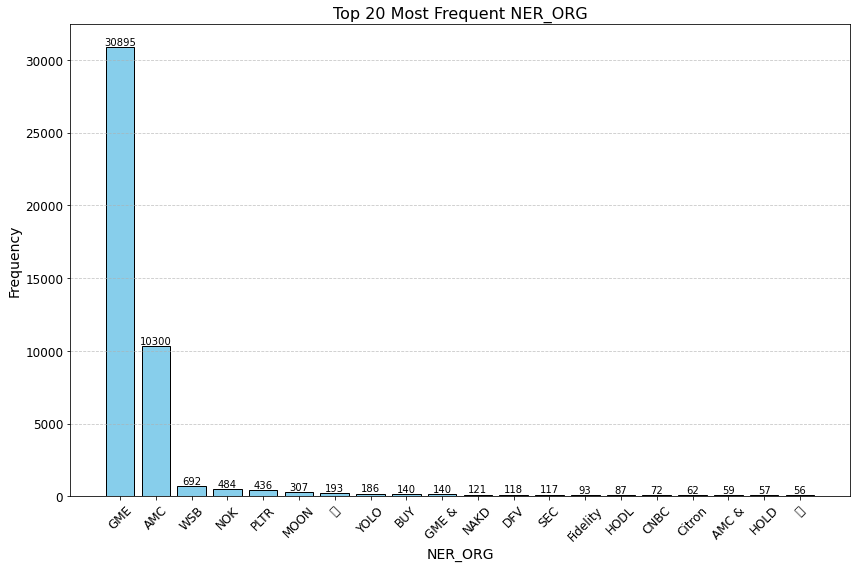

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Slightly larger figure size for better clarity
bars = plt.bar(top_20['mentioned'], top_20['Frequency'], color='skyblue',edgecolor='black')  # Adding color to the bars

plt.xlabel('NER_ORG', fontname='DejaVu Sans', fontsize=14)  # Adjusted font size for better readability
plt.ylabel('Frequency', fontname='DejaVu Sans', fontsize=14)
plt.title('Top 20 Most Frequent NER_ORG', fontname='DejaVu Sans', fontsize=16)

# Set fontname and size for x-ticks, and rotate them for better fit
plt.xticks(fontname='DejaVu Sans', fontsize=12, rotation=45)
plt.yticks(fontname='DejaVu Sans', fontsize=12)  # Set font size for y-ticks as well

# Add grid lines behind the bars
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally add the data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=10)

# Improve layout to accommodate the rotated x-ticks
plt.tight_layout()

plt.show()


In [101]:
import pandas as pd

# Assuming your DataFrame is named df

# Convert 'Converted_Timestamp' to datetime if it's not already
df_reddit['Converted_Timestamp'] = pd.to_datetime(df_reddit['Converted_Timestamp'])

# Extract year and month
df_reddit['YearMonth'] = df_reddit['Converted_Timestamp'].dt.to_period('M')

# Group by year and month, then count the rows
monthly_counts = df_reddit.groupby('YearMonth').size().reset_index(name='Count')

print(monthly_counts)


  YearMonth  Count
0   2020-09      1
1   2020-10    283
2   2020-11    485
3   2020-12   1223
4   2021-01  12394
5   2021-02  11065
6   2021-03   9024
7   2021-04   3078
8   2021-05    278


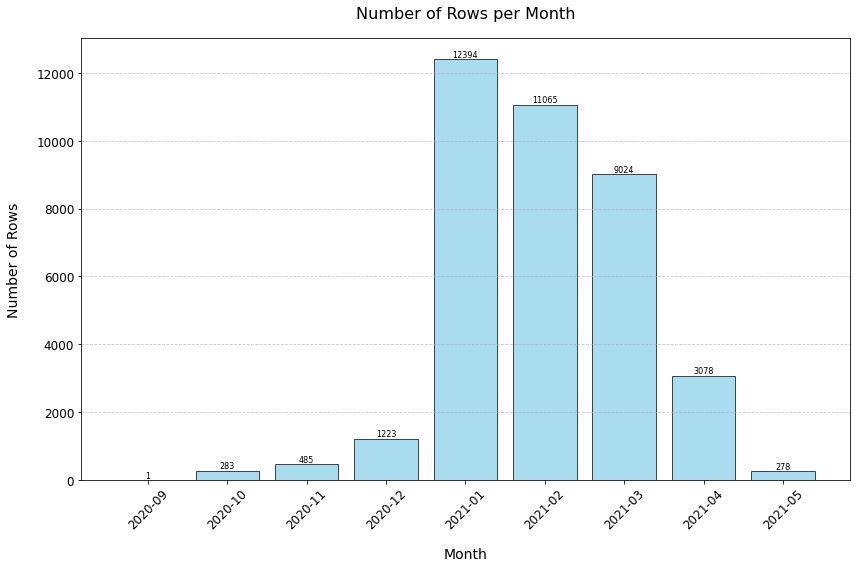

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'monthly_counts' is your DataFrame with 'YearMonth' and 'Count' columns

# Plot
plt.figure(figsize=(12, 8))  # Larger figure size for better visibility
bars = plt.bar(monthly_counts['YearMonth'].astype(str), monthly_counts['Count'],
               color='skyblue', edgecolor='black', linewidth=1, alpha=0.7)  # Styled bars

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

# Labeling
plt.xlabel('Month', fontsize=14, labelpad=15)
plt.ylabel('Number of Rows', fontsize=14, labelpad=15)
plt.title('Number of Rows per Month', fontsize=16, pad=20)

# Ticks
plt.xticks(rotation=45, fontsize=12)  # Rotate and set font size for x-axis labels
plt.yticks(fontsize=12)  # Set font size for y-axis labels

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Only horizontal grid lines for readability

# Layout and display
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()



In [103]:

# Convert 'Converted_Timestamp' to datetime
df_reddit['Converted_Timestamp'] = pd.to_datetime(df_reddit['Converted_Timestamp'])

# Extract date from 'Converted_Timestamp'
df_reddit['date'] = df_reddit['Converted_Timestamp'].dt.date

# Count mentions per day
date_count = df_reddit['date'].value_counts().sort_index()

# Convert to DataFrame for display
date_count_df = date_count.reset_index()
date_count_df.columns = ['Date', 'Count']


In [104]:
# Read the CSV file
df_stock = pd.read_csv('combined_historical_data.csv')

# Remove the timezone information
df_stock['Date'] = df_stock['Date'].str.split(' ').str[0]

# Convert to datetime format
df_stock['Date'] = pd.to_datetime(df_stock['Date'], errors='coerce')

# Pivot the data to have closing prices in separate columns for each ticker
close_prices = df_stock.pivot_table(index='Date', columns='Ticker', values='Close', aggfunc='last')

# Rename the columns to include the ticker symbol
close_prices = close_prices.add_prefix('Close_')

# Group by Date and sum the Volume for each date
volume_data = df_stock.groupby('Date')['Volume'].sum()

# Combine the close prices and volume data into a single DataFrame
combined_data = close_prices.join(volume_data)

print(combined_data.head())

            Close_AMC  Close_GME  Close_TSLA     Volume
Date                                                   
2020-01-02  74.554512     1.5775   28.684000  161250490
2020-01-03  73.155365     1.4700   29.534000  281074900
2020-01-06  71.156586     1.4625   30.102667  165864540
2020-01-07  71.256531     1.3800   31.270666  289464030
2020-01-08  66.159630     1.4300   32.809334  490337800


In [105]:
date_count_df['Date'] = pd.to_datetime(date_count_df['Date'])
combined_data_reset = combined_data.reset_index()
combined_data_reset['Date'] = pd.to_datetime(combined_data_reset['Date'])

stock_reddit = pd.merge(date_count_df,combined_data_reset, how='inner', on = 'Date')

display(stock_reddit.head())

,Date,Count,Close_AMC,Close_GME,Close_TSLA,Volume
0,2020-09-30,1,47.099998,2.5500,143.003326,169004340
1,2020-10-02,1,46.500000,2.3475,138.363327,232009600
2,2020-10-05,1,41.299999,2.3650,141.893326,146335280
3,2020-10-07,2,40.400002,2.3400,141.766663,143309270
4,2020-10-08,33,41.400002,3.3725,141.973328,427864550


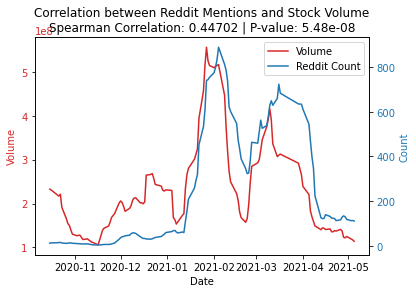

In [106]:
from scipy import stats

stock_reddit['Date'] = pd.to_datetime(stock_reddit['Date'])

# Set 'Date' as the index of the DataFrame for time series analysis
stock_reddit.set_index('Date', inplace=True)

# Drop any rows with NaN values to avoid errors in correlation and plotting
stock_reddit.dropna(inplace=True)

# Calculate Spearman correlation
corr, pval = stats.spearmanr(stock_reddit['Count'], stock_reddit['Volume'])

# Plotting
# Define rolling window size for smoothing (adjust if needed)
window_size = 10

# Calculate rolling means
rolling_mentions = stock_reddit['Count'].rolling(window=window_size).mean()
rolling_volume = stock_reddit['Volume'].rolling(window=window_size).mean()

# Create subplots
fig, ax1 = plt.subplots()

# Plot the rolling means of stock volume and reddit mentions
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color=color)
line1, = ax1.plot(rolling_volume, color=color, label='Volume')  # Add label for legend
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Count', color=color)  
line2, = ax2.plot(rolling_mentions, color=color, label='Reddit Count')  # Add label for legend
ax2.tick_params(axis='y', labelcolor=color)

# Title with Spearman correlation result
plt.title(f'Correlation between Reddit Mentions and Stock Volume\nSpearman Correlation: {corr:.5f} | P-value: {pval:.2e}')

# Add legends
lines = [line1, line2]
ax1.legend(lines, [l.get_label() for l in lines])

# Show the plot
plt.show()


In [107]:
import pandas as pd

# Read the CSV file
df_stock = pd.read_csv('combined_historical_data.csv')

# Remove the timezone information
df_stock['Date'] = df_stock['Date'].str.split(' ').str[0]

# Convert to datetime format
df_stock['Date'] = pd.to_datetime(df_stock['Date'], errors='coerce')

# Pivot the data to have closing prices in separate columns for each ticker
close_prices = df_stock.pivot_table(index='Date', columns='Ticker', values='Close', aggfunc='last')

# Rename the columns to include 'Close_' prefix
close_prices.columns = ['Close_' + str(col) for col in close_prices.columns]

# Pivot the data to have volumes in separate columns for each ticker
volume_data = df_stock.pivot_table(index='Date', columns='Ticker', values='Volume', aggfunc='sum')

# Rename the columns to include 'Volume_' prefix
volume_data.columns = ['Volume_' + str(col) for col in volume_data.columns]

# Combine the close prices and volume data into a single DataFrame
combined_data = close_prices.join(volume_data)

# Now you have a DataFrame where each 'Close_' and 'Volume_' column is specific to a ticker
print(combined_data.head())


            Close_AMC  Close_GME  Close_TSLA  Volume_AMC  Volume_GME  \
Date                                                                   
2020-01-02  74.554512     1.5775   28.684000      454590    17814400   
2020-01-03  73.155365     1.4700   29.534000      221800    14175600   
2020-01-06  71.156586     1.4625   30.102667      290340    13579200   
2020-01-07  71.256531     1.3800   31.270666      320530    20912000   
2020-01-08  66.159630     1.4300   32.809334      655700    22517600   

            Volume_TSLA  
Date                     
2020-01-02    142981500  
2020-01-03    266677500  
2020-01-06    151995000  
2020-01-07    268231500  
2020-01-08    467164500  


In [108]:
import pandas as pd
from ast import literal_eval

# Read in the data
df_reddit = pd.read_csv('matching_rows.csv')

# Convert the string representation of lists in 'NER_ORG' to actual lists
df_reddit['NER_ORG'] = df_reddit['NER_ORG'].apply(literal_eval)

# Convert the 'timestamp' column to a datetime object and set as the index
df_reddit['timestamp'] = pd.to_datetime(df_reddit['timestamp'], unit='s')
df_reddit.set_index('timestamp', inplace=True)

# Create boolean columns for GME and AMC mentions
df_reddit['GME_mention'] = df_reddit['NER_ORG'].apply(lambda x: 'GME' in x)
df_reddit['AMC_mention'] = df_reddit['NER_ORG'].apply(lambda x: 'AMC' in x)
df_reddit['TSLA_mention'] = df_reddit['NER_ORG'].apply(lambda x: 'TSLA' in x)

# Resample to get daily counts and sum the boolean columns
daily_mentions = df_reddit.resample('D').agg({'GME_mention': 'sum', 'AMC_mention': 'sum', 'TSLA_mention' : 'sum'})

# Reset the index to turn the dates back into a column
daily_mentions.reset_index(inplace=True)

# Rename the 'timestamp' column to 'Date'
daily_mentions.rename(columns={'timestamp': 'Date'}, inplace=True)

# Display the DataFrame with the daily mention counts
display(daily_mentions.head())


,Date,GME_mention,AMC_mention,TSLA_mention
0,2020-10-01,1,0,0
1,2020-10-02,1,0,0
2,2020-10-03,0,0,0
3,2020-10-04,0,0,0
4,2020-10-05,2,0,0


In [112]:
daily_mentions['Date'] = pd.to_datetime(daily_mentions['Date'])
combined_data_reset = combined_data.reset_index()  
combined_data_reset['Date'] = pd.to_datetime(combined_data_reset['Date'])

# Merge the two DataFrames on the 'Date' column
stock_reddit = pd.merge(daily_mentions, combined_data_reset, how='inner', on='Date')

# Display the first few rows of the merged DataFrame
display(stock_reddit.head(15))


,Date,GME_mention,AMC_mention,TSLA_mention,Close_AMC,Close_GME,Close_TSLA,Volume_AMC,Volume_GME,Volume_TSLA
0,2020-10-01,1,0,0,46.500000,2.4425,149.386673,322380,18216400,152224500
1,2020-10-02,1,0,0,46.500000,2.3475,138.363327,357600,17362000,214290000
2,2020-10-05,2,0,0,41.299999,2.3650,141.893326,946880,11220000,134168400
3,2020-10-06,0,0,0,40.599998,2.2825,137.993332,840420,18141600,147438900
4,2020-10-07,0,2,0,40.400002,2.3400,141.766663,691770,13234400,129383100
5,2020-10-08,24,0,0,41.400002,3.3725,141.973328,786850,305814400,121263300
6,2020-10-09,38,4,0,40.500000,3.0050,144.666672,502140,308611200,86777100
7,2020-10-12,6,0,0,40.799999,2.9500,147.433334,324570,94622800,116373300
8,2020-10-13,7,1,0,35.400002,2.9700,148.883331,1016470,40718800,103391100
9,2020-10-14,5,3,0,29.600000,3.0625,153.766663,3170940,43045600,143639100


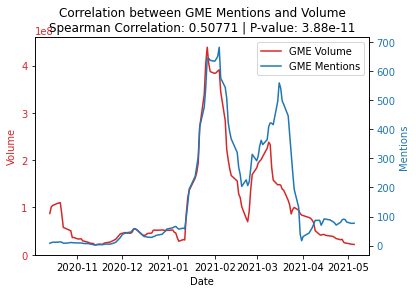

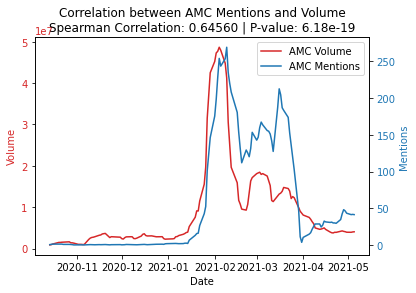

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'stock_reddit' is already defined and contains the relevant data

# Convert 'Date' to datetime and set as index
stock_reddit['Date'] = pd.to_datetime(stock_reddit['Date'])
stock_reddit.set_index('Date', inplace=True)

# Drop any rows with NaN values to avoid errors in correlation and plotting
stock_reddit.dropna(inplace=True)

# Calculate Spearman correlations
corr_gme, pval_gme = stats.spearmanr(stock_reddit['GME_mention'], stock_reddit['Volume_GME'])
corr_amc, pval_amc = stats.spearmanr(stock_reddit['AMC_mention'], stock_reddit['Volume_AMC'])

# Plotting function - generalized to plot any mention and volume
def plot_mentions_vs_volume(mention_col, volume_col, mention_label, volume_label):
    window_size = 10  # Define rolling window size for smoothing

    # Calculate rolling means
    rolling_mentions = stock_reddit[mention_col].rolling(window=window_size).mean()
    rolling_volume = stock_reddit[volume_col].rolling(window=window_size).mean()

    # Create subplots
    fig, ax1 = plt.subplots()

    # Plot the rolling means of stock volume
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Volume', color=color)
    line1, = ax1.plot(rolling_volume, color=color, label=f'{volume_label} Volume')
    ax1.tick_params(axis='y', labelcolor=color)

    # Instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Mentions', color=color)
    line2, = ax2.plot(rolling_mentions, color=color, label=f'{mention_label} Mentions')
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and legends
    corr, pval = stats.spearmanr(stock_reddit[mention_col], stock_reddit[volume_col])
    plt.title(f'Correlation between {mention_label} Mentions and Volume\nSpearman Correlation: {corr:.5f} | P-value: {pval:.2e}')
    lines = [line1, line2]
    ax1.legend(lines, [l.get_label() for l in lines])

    # Show the plot
    plt.show()

# Plot for GME
plot_mentions_vs_volume('GME_mention', 'Volume_GME', 'GME', 'GME')

# Plot for AMC
plot_mentions_vs_volume('AMC_mention', 'Volume_AMC', 'AMC', 'AMC')
